In [1]:
!pip install seaborn
# !pip install sklearn --quiet
!pip install scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [7]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
from urllib.request import urlretrieve

url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x1e4af8cb4a0>)

In [9]:
medicalDataFrame = pd.read_csv("medical.csv")
# print(medicalDataFrame)

medicalDataFrame.info()
medicalDataFrame.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [10]:
medicalDataFrame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
fig = px.histogram(
    data_frame = medicalDataFrame,
    nbins=47,
    x = "age",
    marginal='box',
    title="distribution of ages"
)

fig.update_layout({"bargap" :0.1})
fig.show()

In [14]:
fig = px.histogram(
    data_frame = medicalDataFrame,
    nbins=47,
    x = "bmi",
     color_discrete_sequence = ['red'],
    marginal='box',
    title="distribution of BMI"
)

fig.update_layout({"bargap" :0.1})
fig.show()

In [17]:
fig = px.histogram(
    data_frame = medicalDataFrame,
    nbins=47,
    x = "charges",
    color= 'smoker',
    color_discrete_sequence = ['green', 'grey'],
    marginal='box',
    title="annual charges"
)

fig.update_layout({"bargap" :0.1})
fig.show()

In [18]:
medicalDataFrame.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
fig = px.histogram(
    data_frame=medicalDataFrame,
    x = "smoker",
    color = "sex",
    title = "smoker"
)

fig.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

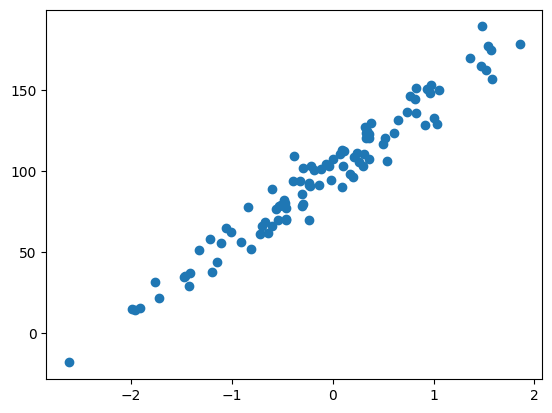

In [14]:
bias = 100
x, y, coef = make_regression(
    n_features= 1,
    noise = 10,
    coef = True,
    bias = bias,
    random_state = 42
)

# print(x.shape, y.shape, coef)

plt.scatter(x, y)

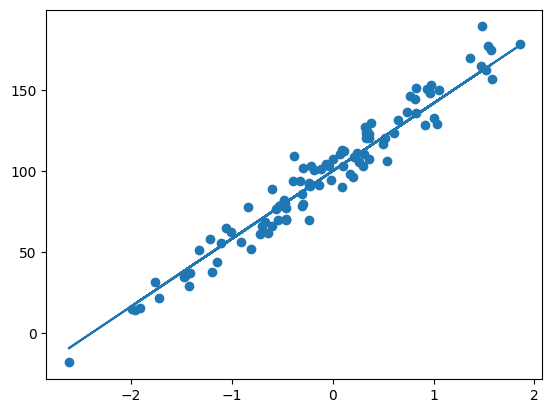

In [21]:
y_gen = x * coef + bias

plt.scatter(x, y)
plt.plot(x, y_gen)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x, y)


print(model.coef_, model.intercept_)

[44.43716999] 101.16511532052698


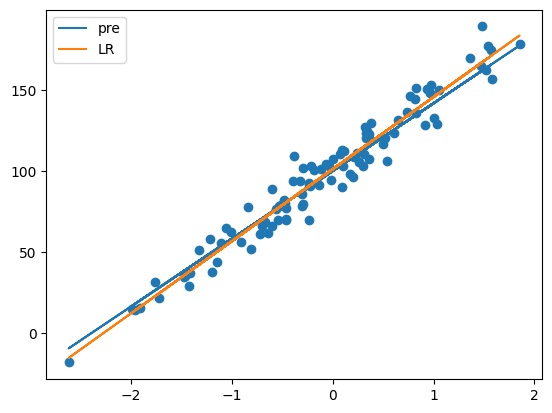

In [24]:
plt.scatter(x, y)
plt.plot(x, y_gen, label = "pre")
plt.plot(x, model.predict(x), label = "LR")
plt.legend()

In [60]:
class LinearRegressionCustom:
    def __init__(self, lr:int = 0.1):
        self.lr = lr

    def fit(self, x, y) -> list:
        self._X = x
        self._Y = y.reshape(-1, 1)

        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()

        errors = []

        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())

        return errors

    def gradient_decend(self):
        d_coef, d_intercept = self.gradient()

        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr

    def gradient(self):
        yh = self.predict(self._X)

        d_coef = ((yh - self._Y) * self._X).mean()
        d_intercept = (yh - self._Y).mean()

        return d_coef, d_intercept

    def predict(self, X):
        return X * self.coef_ + self.intercept_

    def error(self):
        return ((self.predict(self._X) - self._Y) ** 2).sum()


# class LinearRegressionCustom:
#     # constructor
#     def __init__(self, lr=0.1):
#         self.lr = lr

#     # training function i.e. fit
#     def fit(self, X, y):
#         self._X = X # _X mock behavior like private
#         self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape

#         # need to figure out value of coef & intercept
#         # step 1: pick these values at random
#         self.coef_ = np.random.random()
#         self.intercept_ = np.random.random()

#         # gradient descent
#         errors = []

#         # lets say we do this 50 times
#         for i in range(50):
#             self.gradient_decend()
#             errors.append(self.error())
#         return errors

#     def gradient_decend(self):
#         # change in coef and intercept
#         d_coef, d_intercept = self.gradient()
#         self.coef_ -= d_coef * self.lr
#         self.intercept_ -= d_intercept * self.lr

#     def gradient(self):
#         yh = self.predict(self._X) # from predict funtion

#         d_coef = ((yh - self._y) * self._X).mean()
#         d_intercept = (yh - self._y).mean()

#         return d_coef, d_intercept

#     def predict(self, X):
#         return X * self.coef_ + self.intercept_

#     def error(self):
#         return ((self.predict(self._X) - self._y) ** 2).sum()



In [61]:
model = LinearRegressionCustom()

errors = model.fit(x, y)



print(model.coef_, model.intercept_)

43.26396188276779 100.30043912357637


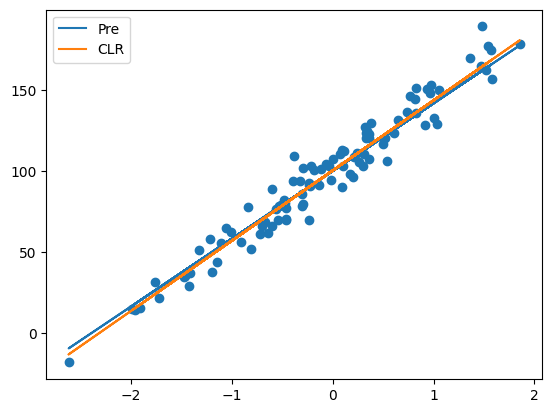

In [62]:

plt.scatter(x, y)
plt.plot(x, y_gen, label="Pre")
plt.plot(x, model.predict(x), label="CLR")
plt.legend()

[np.float64(897032.9011346053), np.float64(742306.0748346909), np.float64(615037.5382520321), np.float64(510262.90500230563), np.float64(423930.681707505), np.float64(352731.8731176789), np.float64(293961.80039542407), np.float64(245407.97759567347), np.float64(205259.07763972617), np.float64(172030.97512238895), np.float64(144506.62403205576), np.float64(121687.15002793694), np.float64(102752.03835526072), np.float64(87026.7031532669), np.float64(73956.05061994212), np.float64(63082.91236834037), np.float64(54030.438517450224), np.float64(46487.71240843357), np.float64(40197.98821888886), np.float64(34949.06552275847), np.float64(30565.40613577141), np.float64(26901.672526161085), np.float64(23837.42698808257), np.float64(21272.779356781662), np.float64(19124.810457475283), np.float64(17324.630473496716), np.float64(15814.957406158468), np.float64(14548.121920131192), np.float64(13484.422046150381), np.float64(12590.765193185738), np.float64(11839.546307983312), np.float64(11207.72029

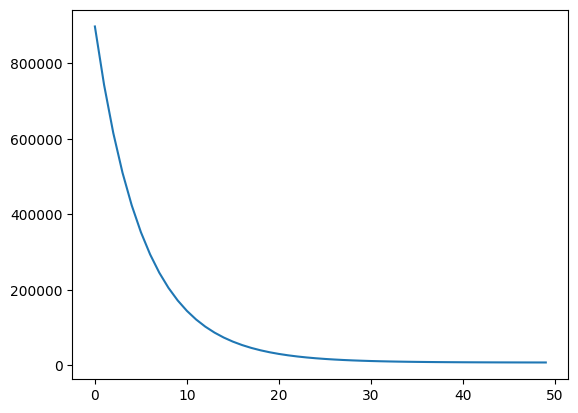

In [64]:
plt.plot( errors)

print(errors)

In [3]:
# from sklearn.datasets import load_boston
from urllib.request import urlretrieve
import pandas as pd
from sklearn.model_selection import train_test_split


url = "http://lib.stat.cmu.edu/datasets/boston"

urlretrieve(url = url, filename= "boston.csv")

('boston.csv', <http.client.HTTPMessage at 0x72ac1aab2930>)

In [4]:
dataFrame = pd.read_csv(filepath_or_buffer='boston.csv', sep='delimeter', header = None)
print(dataFrame)

                                                      0
0     The Boston house-price data of Harrison, D. an...
1     prices and the demand for clean air', J. Envir...
2     vol.5, 81-102, 1978.   Used in Belsley, Kuh & ...
3     ...', Wiley, 1980.   N.B. Various transformati...
4                          pages 244-261 of the latter.
...                                                 ...
1027                               396.90   5.64  23.90
1028  0.10959   0.00  11.930  0  0.5730  6.7940  89....
1029                               393.45   6.48  22.00
1030  0.04741   0.00  11.930  0  0.5730  6.0300  80....
1031                               396.90   7.88  11.90

[1032 rows x 1 columns]


/tmp/ipykernel_6446/2759948707.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataFrame = pd.read_csv(filepath_or_buffer='boston.csv', sep='delimeter', header = None)
